# 관광명소

In [4]:
import numpy as np
import pandas as pd

In [29]:
area = pd.read_csv("data/area_edit.csv", encoding='utf-8')
visitors = pd.read_csv("data\sum_visitors.csv", encoding='utf-8')

In [3]:
area.head()

,Unnamed: 0,지역명,관광지 수
0,0,강원특별자치도 강릉시,369
1,1,강원특별자치도 고성군,142
2,2,강원특별자치도 동해시,91
3,3,강원특별자치도 삼척시,179
4,4,강원특별자치도 속초시,109


In [4]:
visitors.head()

,지자체,방문자수
0,강원특별자치도 강릉시,100420235
1,강원특별자치도 고성군,21565109
2,강원특별자치도 동해시,36371996
3,강원특별자치도 삼척시,28384703
4,강원특별자치도 속초시,50236736


In [30]:
# 'Unnamed: 0' 열 제거
area = area.drop(columns=['Unnamed: 0'])

# 열 이름 변경 (필요시)
area.rename(columns={'지역명': 'region', '관광지 수': 'average_search_rank'}, inplace=True)
visitors.rename(columns={'지자체': 'region', '방문자수': 'visitor_count'}, inplace=True)

# 데이터 병합
merged_df = pd.merge(area, visitors, on='region')

# 병합된 데이터 확인
merged_df.head()
merged_df = merged_df.dropna()

In [7]:
# 상관관계 계산=음의 상관관계
correlation_matrix = merged_df[['average_search_rank', 'visitor_count']].corr()

print("Correlation matrix:")
correlation_matrix.head()


Correlation matrix:


,average_search_rank,visitor_count
average_search_rank,1.000000,0.068465
visitor_count,0.068465,1.000000


In [31]:
# 관광명소 상관분석
from scipy.stats import pearsonr

correlation, p_value = pearsonr(merged_df['average_search_rank'], merged_df['visitor_count'])

print(p_value)
print(correlation)

0.39420887495117274
0.06846502966944251


# 국내여행횟수

In [9]:
Number = pd.read_csv("data\국내관광여행횟수_수정본.csv", encoding='utf-8')
visitors = pd.read_csv("data\sum_visitors.csv", encoding='utf-8')

In [10]:
Number.head()

,행정구역별(1),인구 1인당 여행횟수 (회),관광자 1인당 여행횟수 (회)
0,서울특별시,3.3,4.9
1,부산광역시,3.9,6.1
2,대구광역시,3.9,6.0
3,인천광역시,3.1,4.9
4,광주광역시,4.2,5.9


In [11]:
visitors['지자체']=visitors['지자체'].str.split(' ').str[0]

In [12]:
# 열 이름 변경 (필요시)
Number.rename(columns={'행정구역별(1)': 'region','인구 1인당 여행횟수 (회)': 'Number of trips per population', '관광자 1인당 여행횟수 (회)': 'Number of trips per tourist'}, inplace=True)
visitors.rename(columns={'지자체': 'region', '방문자수': 'visitor_count'}, inplace=True)

# 데이터 병합
merged_df = pd.merge(Number, visitors, on='region')

# 병합된 데이터 확인
merged_df.head()
merged_df = merged_df.dropna()

In [13]:
#국내여행횟수 상관분석
from scipy.stats import pearsonr

correlation, p_value = pearsonr(merged_df['Number of trips per tourist'], merged_df['visitor_count'])

print(p_value)
print(correlation)

0.4382053548152632
-0.06603917195117928


# 숙박업소

In [14]:
hotels = pd.read_csv("data/grouped_hotel.csv", encoding='utf-8')
visitors = pd.read_csv("data\sum_visitors.csv", encoding='utf-8')

In [15]:
hotels['지역명'] = hotels['지역명'].str.replace('도 ','도  ')
hotels['지역명'] = hotels['지역명'].str.strip()

In [16]:
hotels.head()

,지역명,호텔 개수
0,강원특별자치도 강릉시,718
1,강원특별자치도 고성군,229
2,강원특별자치도 동해시,115
3,강원특별자치도 삼척시,177
4,강원특별자치도 속초시,294


In [17]:
# 열 이름 변경 (필요시)
hotels.rename(columns={'지역명': 'region', '호텔 개수': 'hotels_count'}, inplace=True)
visitors.rename(columns={'지자체': 'region', '방문자수': 'visitor_count'}, inplace=True)

# 데이터 병합
merged_df = pd.merge(hotels, visitors, on='region', how='right')

# 병합된 데이터 확인
merged_df = merged_df.dropna()
merged_df.head()



,region,hotels_count,visitor_count
63,광주광역시 광산구,85.0,128628996
64,광주광역시 남구,16.0,49584129
65,광주광역시 동구,51.0,59873785
66,광주광역시 북구,71.0,133498437
67,광주광역시 서구,100.0,113391932


In [18]:
#숙박업소 상관계수
from scipy.stats import pearsonr

correlation, p_value = pearsonr(merged_df['hotels_count'], merged_df['visitor_count'])

print(p_value)
print(correlation)

0.04590645063131185
0.33024439521464344


# 신용카드(내국인)

In [19]:
credit_card = pd.read_csv("data\신용카드 지출액_월별(내국인).csv", encoding='utf-8')
visitors = pd.read_csv("data/visit.csv", encoding='utf-8')

In [20]:
visitors = visitors[visitors['방문자 구분'] == '전체방문자(a+b+c)']
visitors.head()

,기준년월,방문자 구분,방문자수,시,구
4,202301,전체방문자(a+b+c),8979957,강원특별자치도,춘천시
9,202301,전체방문자(a+b+c),9530785,강원특별자치도,원주시
14,202301,전체방문자(a+b+c),8031760,강원특별자치도,강릉시
19,202301,전체방문자(a+b+c),2946561,강원특별자치도,동해시
24,202301,전체방문자(a+b+c),1491579,강원특별자치도,태백시


In [21]:
merged_df = pd.merge(credit_card, visitors, on=['기준년월', '시'], how='inner')
merged_df['region'] = 
print(merged_df)
merged_df = merged_df.dropna()

        기준년월      시          지출액        방문자 구분      방문자수     구
0     202301  부산광역시  259000000.0  전체방문자(a+b+c)   4460629    중구
1     202301  부산광역시  259000000.0  전체방문자(a+b+c)   3276086    서구
2     202301  부산광역시  259000000.0  전체방문자(a+b+c)   4049000    동구
3     202301  부산광역시  259000000.0  전체방문자(a+b+c)   3434108   영도구
4     202301  부산광역시  259000000.0  전체방문자(a+b+c)  12501184  부산진구
...      ...    ...          ...           ...       ...   ...
1975  202312   충청북도   79300000.0  전체방문자(a+b+c)   1320041   증평군
1976  202312   충청북도   79300000.0  전체방문자(a+b+c)   2372011   진천군
1977  202312   충청북도   79300000.0  전체방문자(a+b+c)   1211365   괴산군
1978  202312   충청북도   79300000.0  전체방문자(a+b+c)   3083478   음성군
1979  202312   충청북도   79300000.0  전체방문자(a+b+c)   1042746   단양군

[1980 rows x 6 columns]


In [22]:
#신용카드(내국인) 상관계수
from scipy.stats import pearsonr

correlation, p_value = pearsonr(merged_df['지출액'], merged_df['방문자수'])

print(p_value)
print(correlation)

7.177144063639271e-54
0.33823925896607404


# 신용카드(외국인)

In [23]:
credit_card = pd.read_csv("data\신용카드 지출액_월별(내국인).csv", encoding='utf-8')
visitors = pd.read_csv("data/visit.csv", encoding='utf-8')

In [24]:
merged_df = pd.merge(credit_card, visitors, on=['기준년월', '시'], how='inner')
print(merged_df)
merged_df = merged_df.dropna()

        기준년월      시          지출액        방문자 구분     방문자수    구
0     202301  부산광역시  259000000.0     현지인방문자(a)  1179832   중구
1     202301  부산광역시  259000000.0     외지인방문자(b)  3278177   중구
2     202301  부산광역시  259000000.0     외국인방문자(c)     2620   중구
3     202301  부산광역시  259000000.0    외부방문자(b+c)  3280797   중구
4     202301  부산광역시  259000000.0  전체방문자(a+b+c)  4460629   중구
...      ...    ...          ...           ...      ...  ...
9895  202312   충청북도   79300000.0     현지인방문자(a)   517212  단양군
9896  202312   충청북도   79300000.0     외지인방문자(b)   524713  단양군
9897  202312   충청북도   79300000.0     외국인방문자(c)      821  단양군
9898  202312   충청북도   79300000.0    외부방문자(b+c)   525534  단양군
9899  202312   충청북도   79300000.0  전체방문자(a+b+c)  1042746  단양군

[9900 rows x 6 columns]


In [25]:
#신용카드(외국인) 상관계수
from scipy.stats import pearsonr

correlation, p_value = pearsonr(merged_df['지출액'], merged_df['방문자수'])

print(p_value)
print(correlation)

1.0065058743285515e-124
0.23609729165728427


# 히트맵 그리기

In [60]:
# 열 이름 변경 (필요시)
area.rename(columns={'지역명': 'region', '관광지 수': 'average_search_rank'}, inplace=True)
visitors.rename(columns={'지자체': 'region', '방문자수': 'visitor_count'}, inplace=True)

# 데이터 병합
df = pd.merge(area, visitors, on='region', how='right')
df = pd.merge(df, Number, on='region', how='right')
df = pd.merge(df,hotels,  on='region', how='right')

#결측치 처리
columns_to_fill = merged_df.columns.difference(['region'])  # region 열을 제외한 열 선택
merged_df[columns_to_fill] = merged_df[columns_to_fill].fillna(merged_df[columns_to_fill].mean())

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic') #Windows: malgun gothic, Mac: AppleGothic
plt.rc('axes', unicode_minus=False)

In [4]:
df_p_value={
    '관광명소' : 0.39420887495117274,
    '국내여행횟수' : 0.4382053548152632,
    '숙박업소' : 0.04590645063131185,
    '신용카드(내국인)' : 7.177144063639271e-54,
    '신용카드(외국인)' : 1.0065058743285515e-124,
    '검색건수' : 0.0,
    '검색순위' : 0.0006427976435926072,
    'sns 언급량' : 1.3683112328549083e-26,
    '관외 이동량' : 0.0
}

df_corr={
    '관광명소' : 0.06846502966944251,
    '국내여행횟수' : -0.06603917195117928,
    '숙박업소' : 0.33024439521464344,
    '신용카드(내국인)' : 0.33823925896607404,
    '신용카드(외국인)' : 0.23609729165728427,
    '검색건수' : 0.7385483893290259,
    '검색순위' : 0.3568601743323966,
    'sns 언급량' : 0.7038444531025007,
    '관외 이동량' : 0.8974982725764913
}

상관계수 히트맵

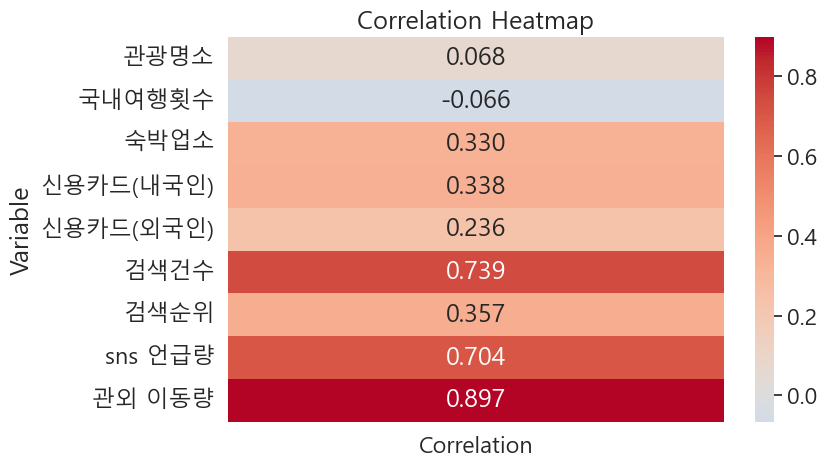

In [5]:
# 데이터프레임 생성
df_corr = pd.DataFrame(list(df_corr.items()), columns=['Variable', 'Correlation'])

# 히트맵 그리기
plt.figure(figsize=(8, 5))
sns.heatmap(df_corr.set_index('Variable'), annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

p값 히트맵

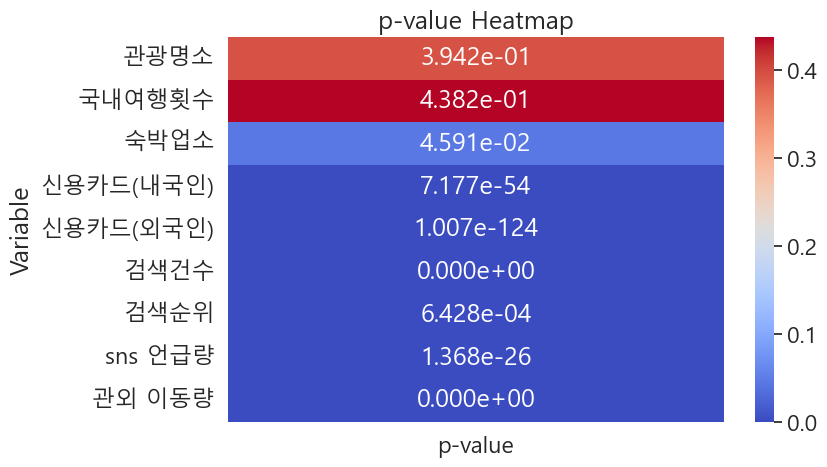

In [6]:
# 데이터프레임 생성
df_p_value = pd.DataFrame(list(df_p_value.items()), columns=['Variable', 'p-value'])

# 히트맵 그리기
plt.figure(figsize=(8, 5))
sns.heatmap(df_p_value.set_index('Variable'), annot=True, cmap='coolwarm', fmt='.3e')
plt.title('p-value Heatmap')
plt.show()